In [2]:
import numpy as np
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.20f}'.format})
from scipy.stats import norm
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from scipy.stats import f
import sys
# pd.set_option('display.float_format', '{:.20f}'.format)
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.20f}'.format})
# sys.float_repr = lambda x: format(x, '.20f')
import warnings
from helpers import *

In [2]:
knum=5
def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/600_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   print(compute_k_truncated_Z(Z,knum)[-1])
   # unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = 1, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Final(77,25)

10.906387783039733


[2, 1, 3, 4, 0]

In [5]:

df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/600_'+str(100)+'_5Xfull'+str(46+1)+'.csv')
df =df.drop('Unnamed: 0',axis=1)
Z = np.array(df,dtype = 'float64')
Z[Final(68,125),Final(68,125)]

array([-0.01151393,  0.01981881,  0.0988895 ])

In [ ]:
n = 100
plist = [15,25,35,45,55]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('SGL', Z, knum, train_size=300, svd_C = compute_k_truncated_svd(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_5_sgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({2: 99, 3: 99, 1: 99, 4: 98, 0: 51, 7: 5, 22: 5, 17: 4, 21: 4, 8: 3, 13: 3, 16: 3, 24: 3, 11: 2, 14: 2, 20: 2, 9: 2, 15: 1, 12: 1, 5: 1, 10: 1, 19: 1, 23: 1, 6: 1})
selected factor size: 4.91 CP: 0.51 CF: 0.42 TR: 0.892 FR: 0.045 F1: 0.902694
(4.91, 0.51, 0.42, 0.892, 0.045, 0.902694)
Counter({2: 100, 4: 100, 1: 100, 3: 100, 0: 97, 7: 1, 33: 1, 21: 1, 31: 1, 20: 1})
selected factor size: 5.02 CP: 0.97 CF: 0.93 TR: 0.994 FR: 0.003 F1: 0.99396
(5.02, 0.97, 0.93, 0.994, 0.003, 0.99396)
Counter({4: 100, 2: 100, 3: 100, 1: 100, 0: 99, 11: 1})
selected factor size: 5.0 CP: 0.99 CF: 0.98 TR: 0.998 FR: 0.001 F1: 0.99798
(5.0, 0.99, 0.98, 0.998, 0.001, 0.99798)
Counter({4: 100, 2: 100, 3: 100, 1: 100, 0: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)
Counter({4: 100, 3: 100, 2: 100, 1: 100, 0: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)


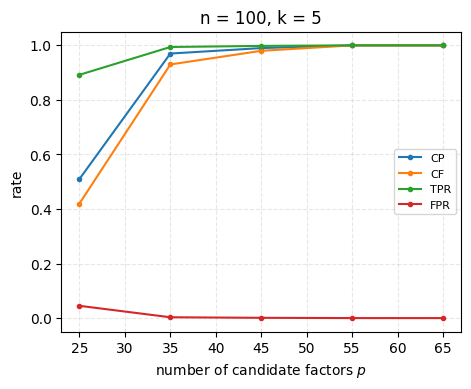

In [21]:
n = 100
plist = [25,35,45,55,65]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('TSMS', Z, knum, train_size=300, svd_C = compute_k_truncated_svd(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.15) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        if not unionset:
            length=0
        else:
            length=len(unionset)
        Final_knum.append(length)
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_5_tsms.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({2: 89, 1: 80, 3: 77, 0: 73, 4: 59, 14: 8, 13: 8, 6: 6, 12: 5, 8: 5, 9: 5, 11: 4, 7: 3, 5: 2, 10: 1})
selected factor size: 4.25 CP: 0.22 CF: 0.18 TR: 0.756 FR: 0.047 F1: 0.811611
(4.25, 0.22, 0.18, 0.756, 0.047, 0.811611)
Counter({2: 98, 3: 97, 1: 94, 0: 91, 4: 76, 22: 3, 24: 2, 21: 2, 15: 2, 10: 1, 20: 1, 8: 1, 17: 1, 13: 1, 6: 1, 14: 1, 23: 1, 11: 1})
selected factor size: 4.74 CP: 0.62 CF: 0.56 TR: 0.912 FR: 0.018 F1: 0.933677
(4.74, 0.62, 0.56, 0.912, 0.018, 0.933677)
Counter({2: 100, 1: 99, 3: 98, 0: 97, 4: 90, 20: 1, 17: 1, 33: 1, 13: 1})
selected factor size: 4.88 CP: 0.85 CF: 0.84 TR: 0.968 FR: 0.003 F1: 0.979313
(4.88, 0.85, 0.84, 0.968, 0.003, 0.979313)
Counter({3: 100, 1: 100, 2: 100, 0: 99, 4: 98})
selected factor size: 4.97 CP: 0.97 CF: 0.97 TR: 0.994 FR: 0.0 F1: 0.996667
(4.97, 0.97, 0.97, 0.994, 0.0, 0.996667)
Counter({1: 100, 0: 100, 3: 100, 2: 100, 4: 98})
selected factor size: 4.98 CP: 0.98 CF: 0.98 TR: 0.996 FR: 0.0 F1: 0.997778
(4.98, 0.98, 0.98, 0.996, 0.0

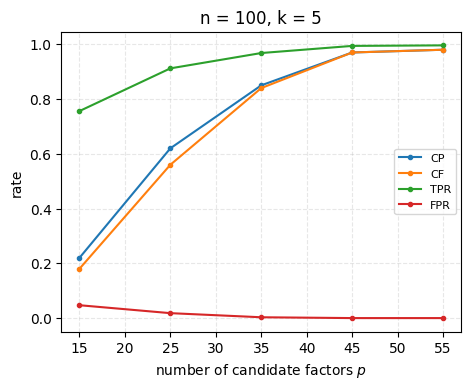

In [22]:
n = 100
plist = [15,25,35,45,55]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('DGL', Z, knum, train_size=300, svd_C = compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_5_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({0: 83, 3: 72, 2: 71, 1: 45, 4: 34, 7: 23, 12: 21, 10: 21, 14: 20, 11: 19, 9: 17, 8: 15, 6: 15, 13: 14, 5: 11})
selected factor size: 4.81 CP: 0.03 CF: 0.0 TR: 0.61 FR: 0.176 F1: 0.63248
(4.81, 0.03, 0.0, 0.61, 0.176, 0.63248)
Counter({0: 81, 3: 80, 2: 73, 1: 42, 4: 38, 18: 10, 14: 9, 12: 9, 8: 7, 20: 7, 21: 7, 22: 7, 11: 6, 15: 6, 6: 5, 9: 5, 16: 5, 24: 4, 23: 4, 13: 4, 7: 4, 19: 3, 17: 3, 5: 2, 10: 1})
selected factor size: 4.22 CP: 0.02 CF: 0.0 TR: 0.628 FR: 0.108 F1: 0.68702
(4.22, 0.02, 0.0, 0.628, 0.108, 0.68702)
Counter({0: 83, 3: 80, 2: 66, 1: 50, 4: 48, 28: 7, 7: 6, 20: 6, 16: 5, 22: 5, 26: 5, 8: 4, 33: 4, 27: 4, 23: 4, 19: 4, 34: 4, 12: 4, 24: 4, 14: 4, 10: 3, 25: 3, 9: 3, 29: 3, 32: 2, 30: 2, 11: 2, 31: 2, 6: 2, 15: 2, 13: 2, 18: 1, 17: 1, 21: 1, 5: 1})
selected factor size: 4.27 CP: 0.06 CF: 0.05 TR: 0.654 FR: 0.064 F1: 0.732047
(4.27, 0.06, 0.05, 0.654, 0.064, 0.732047)
Counter({3: 85, 0: 83, 2: 64, 4: 55, 1: 53, 20: 5, 37: 4, 40: 4, 36: 4, 38: 3, 27: 3, 16: 3, 35:

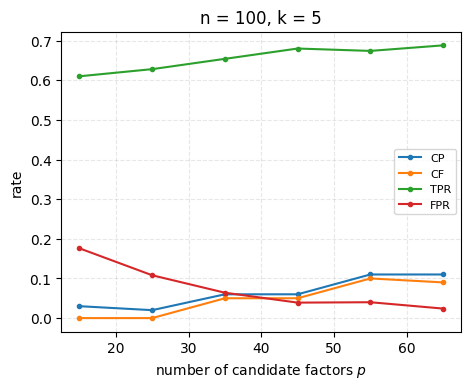

In [3]:
n = 100
plist = [15,25, 35, 45, 55, 65]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('adjSGL', Z, knum, train_size=600, svd_C = p*10*compute_k_truncated_svd(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_5_adjsgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({2: 100, 3: 88, 1: 85, 4: 76, 0: 75, 13: 7, 5: 7, 14: 7, 9: 6, 8: 6, 7: 5, 10: 5, 6: 3, 11: 3, 12: 2})
selected factor size: 4.75 CP: 0.45 CF: 0.36 TR: 0.848 FR: 0.051 F1: 0.867601
(4.75, 0.45, 0.36, 0.848, 0.051, 0.867601)
Counter({2: 100, 3: 100, 1: 100, 0: 99, 4: 96, 18: 2, 16: 1, 9: 1, 13: 1, 19: 1, 6: 1, 12: 1})
selected factor size: 5.03 CP: 0.95 CF: 0.91 TR: 0.99 FR: 0.008 F1: 0.987515
(5.03, 0.95, 0.91, 0.99, 0.008, 0.987515)
Counter({2: 100, 3: 100, 1: 100, 0: 100, 4: 100, 13: 1, 19: 1})
selected factor size: 5.02 CP: 1.0 CF: 0.99 TR: 1.0 FR: 0.002 F1: 0.998333
(5.02, 1.0, 0.99, 1.0, 0.002, 0.998333)
Counter({2: 100, 3: 100, 1: 100, 0: 100, 4: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)
Counter({2: 100, 3: 100, 1: 100, 4: 100, 0: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)
Counter({3: 100, 2: 100, 1: 100, 4: 100, 0: 100})
selected factor size: 5.0 CP: 1

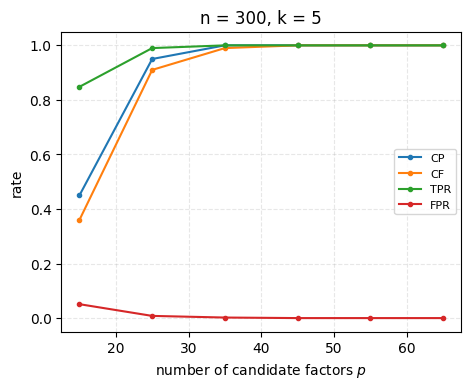

In [26]:
n = 300
plist = [15,25, 35,45,55,65]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/300_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C= compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 300, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_300_5_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [ ]:
n = 300
plist = [15,25, 35,45,55,65]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/300_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C= compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 300, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_300_5_sgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [15]:
import numpy as np
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.20f}'.format})
from scipy.stats import norm
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from scipy.stats import f

# from glmnet import *
import sys
# pd.set_option('display.float_format', '{:.20f}'.format)
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.20f}'.format})
# sys.float_repr = lambda x: format(x, '.20f')
import warnings
warnings.filterwarnings('ignore')

fama285_ = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/Fama285_22.csv')
fama285 = fama285_[fama285_.columns[1:]]
# df96 = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/X_full.csv')
# dff96 = df96[df96.columns[1:]]
df99 = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/X99_22.csv')
dff99 = df99[df99.columns[1:]]
# df22 = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/X_full_22.csv')
# dff22 = df22[df22.columns[1:]]
df22 = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/X22_22.csv')
dff22 = df22[df22.columns[1:]]
df99['Unnamed: 0'] = fama285_['Date']
#显示所有列
pd.set_option('display.max_columns', None)

#显示所有行
pd.set_option('display.max_rows', None)
pd0=pd.DataFrame(evaluate1([
                            # ['HMLM', 'REG' ,'QMJ' ,'STR', 'EPRD', 'PEAD' ,'P52W6'],
                        ['HMLM', 'REG', 'STR','PEAD', 'MKTRF'] ,
                        ['REG', 'IMD', 'PEAD', 'STR', 'ILR1'],

                        # ['REG', 'IMD', 'PEAD', 'STR', 'ILR1', 'IA', 'SMB'],
                          # ['BM', 'EBP', 'IR', 'ME', 'P52W6', 'ROA1', 'ROE1'],
                           ['CEI', 'IVq1', 'TV1', 'MKTRF', 'SMB', 'CMA', 'QMJ'],
                            ["MKTRF", "SMB", "HML", "RMW", "CMA"],
                            # ["MKTRF", "ME", "IA", "ROE", "REG"]],dff99),index=dff99.columns,columns=['mean','sr','mh7','mh8','mh9','SGL','TSMS','ZJ','KNX','FGX','ff5','q5'])
                            ["MKTRF", "ME", "IA", "ROE", "REG"]],dff99),index=dff99.columns,columns=['mean','sr','adjDGL','ZJ','FGX','ff5','q5'])
                            
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
print(pd0['adjDGL'].value_counts()['']+pd0['adjDGL'].value_counts()['$^{*}$'])
print(pd0['ZJ'].value_counts()['']+pd0['ZJ'].value_counts()['$^{*}$'])
print(pd0['FGX'].value_counts()['']+pd0['FGX'].value_counts()['$^{*}$'])
print(pd0['ff5'].value_counts()['']+pd0['ff5'].value_counts()['$^{*}$'])
print(pd0['q5'].value_counts()['']+pd0['q5'].value_counts()['$^{*}$'])


74
56
58
44
83


In [ ]:
def evaluate1(model_fin,X_full):
    
    names0 = X_full.columns
    result_FSE = np.empty((len(names0), (len(model_fin)+2)),dtype='object')
    for m in range(len(model_fin)):
       
        FSE_data = X_full[model_fin[m]].values
        ones = np.ones((X_full.shape[0], 1))
        FSE_data = np.hstack((ones, FSE_data))
        names1 = np.setdiff1d(names0,model_fin[m] )
        Test_data = X_full[names1].values
        
        tmp =  np.empty((len(names0)),dtype='object')
        for z in range(Test_data.shape[1]):
            
            X2 = Test_data[:,z]
            bb = [i for i, name in enumerate(names0) if name == names1[z]]
           
            result_FSE[bb, 0] = np.mean(X2, axis=0) * 100
            result_FSE[bb, 1] = np.mean(X2) / np.std(X2) * np.sqrt(X2.shape[0])
            
            lm1 =sm.OLS(X2, sm.add_constant(FSE_data))
            lm1=lm1.fit()
            
            # result_FSE[bb, m+2] = lm1.params[0] * 100
            result_FSE[bb, m+2] = lm1.pvalues[0] * 100
          
            tmp[bb] = str(round((lm1.params[0] * 100),3))+judge_star(lm1.pvalues[0])
            # tmp[bb] = judge_star(lm1.pvalues[0])
        
        result_FSE[:, m+2] = tmp 
           
    return result_FSE

In [16]:
print(pd0['adjDGL'].value_counts()[''])
print(pd0['ZJ'].value_counts()[''])
print(pd0['FGX'].value_counts()[''])
print(pd0['ff5'].value_counts()[''])
print(pd0['q5'].value_counts()[''])


66
49
52
35
78


In [8]:
pd0

,mean,sr,adjDGL,ZJ,FGX,ff5,q5
Abr1,0.687992,5.130228,,,$^{***}$,$^{***}$,$^{***}$
ACI,0.29543,2.157115,$^{***}$,$^{**}$,,,
ATO,0.38034,2.154571,,,,$^{***}$,
BM,0.450145,2.125403,,$^{***}$,,,
CEI,0.545301,3.366306,,,None,$^{***}$,
CIM1,0.776309,3.429476,$^{***}$,$^{**}$,$^{***}$,$^{***}$,
CLA,0.524906,3.188685,,,$^{***}$,$^{***}$,
COP,0.606942,3.557649,,,$^{***}$,$^{***}$,
CP,0.383445,1.906009,,$^{***}$,,,
CTO,0.307574,1.998988,,,,,


In [17]:

evaluate2([
['HMLM', 'STR' ,'REG', 'PEAD'],      
['REG', 'PEAD', 'STR', 'SIM1', 'ILR1', 'LIQ', 'SMB', 'IMD'],
['MKTRF', 'CMA', 'QMJ', 'REG', 'IA'],
           ["MKTRF", "SMB", "HML", "RMW", "CMA"],
           ["MKTRF", "ME", "IA", "ROE", "REG"]],dff99,36*12 ,list(dff99.columns)).T

,adjDGL,ZJ,FGX,ff5,q5,adjDGL,ZJ,FGX,ff5,q5
AVG,0.65,0.69,0.53,0.36,0.54,0.76,0.73,0.75,0.36,0.74
SR,1.78,1.71,1.85,1.07,1.45,2.71,3.20,2.13,1.20,2.27
alpha_CAPM,0.66$^{***}$,0.64$^{***}$,0.51$^{***}$,0.32$^{***}$,0.48$^{***}$,0.77$^{***}$,0.73$^{***}$,0.73$^{***}$,0.34$^{***}$,0.73$^{***}$
alpha_FF5,0.51$^{***}$,0.58$^{***}$,0.27$^{***}$,0.00,0.28$^{***}$,0.70$^{***}$,0.66$^{***}$,0.53$^{***}$,-0.00,0.53$^{***}$
alpha_q5,0.46$^{***}$,0.39$^{***}$,0.03$^{*}$,0.04,-0.00$^{***}$,0.38$^{***}$,0.38$^{***}$,0.01,0.00,-0.00$^{***}$
AVG,0.21,0.28,0.42,0.30,0.31,0.21,0.22,0.41,0.32,0.33
SR,0.80,0.79,1.34,0.62,0.95,0.65,0.88,1.06,0.84,1.02
alpha_CAPM,0.13$^{*}$,0.11,0.33$^{***}$,0.02,0.12$^{*}$,0.27$^{***}$,0.21$^{***}$,0.36$^{***}$,0.14,0.30$^{***}$
alpha_FF5,0.16$^{**}$,0.16$^{*}$,0.16$^{***}$,0.00$^{***}$,0.07,0.23$^{***}$,0.19$^{***}$,0.22$^{***}$,0.00$^{***}$,0.20$^{**}$
alpha_q5,0.09,0.13,0.07$^{**}$,-0.01,0.00$^{***}$,0.11$^{*}$,0.11$^{**}$,0.01,0.04,-0.00$^{***}$


In [18]:

evaluate2([
["MKTRF",'HMLM', 'STR' ,'REG', 'PEAD'],      
["MKTRF",'REG', 'PEAD', 'STR', 'SIM1', 'ILR1', 'LIQ', 'SMB', 'IMD'],
['MKTRF', 'CMA', 'QMJ', 'REG', 'IA'],
           ["MKTRF", "SMB", "HML", "RMW", "CMA"],
           ["MKTRF", "ME", "IA", "ROE", "REG"]],dff99,36*12 ,list(dff99.columns)).T

,adjDGL,ZJ,FGX,ff5,q5,adjDGL,ZJ,FGX,ff5,q5
AVG,0.59,0.66,0.53,0.36,0.54,0.74,0.73,0.75,0.36,0.74
SR,1.62,1.47,1.85,1.07,1.45,2.87,3.20,2.13,1.20,2.27
alpha_CAPM,0.53$^{***}$,0.57$^{***}$,0.51$^{***}$,0.32$^{***}$,0.48$^{***}$,0.73$^{***}$,0.73$^{***}$,0.73$^{***}$,0.34$^{***}$,0.73$^{***}$
alpha_FF5,0.41$^{***}$,0.51$^{***}$,0.27$^{***}$,0.00,0.28$^{***}$,0.64$^{***}$,0.66$^{***}$,0.53$^{***}$,-0.00,0.53$^{***}$
alpha_q5,0.37$^{***}$,0.35$^{***}$,0.03$^{*}$,0.04,-0.00$^{***}$,0.32$^{***}$,0.37$^{***}$,0.01,0.00,-0.00$^{***}$
AVG,0.39,0.37,0.42,0.30,0.31,0.28,0.23,0.41,0.32,0.33
SR,0.97,0.88,1.34,0.62,0.95,0.98,0.89,1.06,0.84,1.02
alpha_CAPM,0.10$^{*}$,0.10,0.33$^{***}$,0.02,0.12$^{*}$,0.26$^{***}$,0.21$^{***}$,0.36$^{***}$,0.14,0.30$^{***}$
alpha_FF5,0.13$^{**}$,0.14$^{*}$,0.16$^{***}$,0.00$^{***}$,0.07,0.22$^{***}$,0.19$^{***}$,0.22$^{***}$,0.00$^{***}$,0.20$^{**}$
alpha_q5,0.07,0.12,0.07$^{**}$,-0.01,0.00$^{***}$,0.10$^{*}$,0.11$^{**}$,0.01,0.04,-0.00$^{***}$


NameError: name 'dff99' is not defined